# Tarea 1

In [1]:
set.seed(1984)

In [2]:
usePackage <- function(p) 
{
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, repos = "https://cran.itam.mx/")
  suppressPackageStartupMessages(require(p, character.only = TRUE, quietly  = TRUE))
}

# Problema 1

In [3]:

#Funcion amnesia, recibe un vector x numerico
#Dos numeros t,s>0
#Regresa |P(X>s)-P(X>t+s|X>t)|

amnesia <- function(x,t,s){
    p_s <- length(x[x>s])/length(x) # P(X>s)
    n_s <- length(x[x>t])           # Número de elementos en X tal que X>t
    p_ts <- length(x[x>t+s])/n_s    #P(X>t+s|X>t)
    return (abs(p_s-p_ts))
    
}

In [4]:

X <- rexp(100,1)#Muestra aleatoria de 100 observaciones
Y <- rexp(1000000,1)#Muestra aleatoria de 1000 observaciones
t <- 0.5
s <- 2

In [5]:
#Para una muestra con 100 observaciones
amnesia(X,t,s)

[1] 0.006551724

In [6]:
#Para una muestra con 1000,000 observaciones
amnesia(Y,t,s)

[1] 0.0003683295

Para ninguna de las dos muestras $\mathbb{P}(X>t+s|X>t)=\mathbb{P}(X>s)$.

Sin embargo, la muestra con 1000,000 de observaciones tiene un error menor.

A continuación la solución exacta:
$\mathbb{P}(X>s)= 1-\mathbb{P}(X\leq s) = 1-F_{x}(s)$

In [7]:
#Probabilidad real
1-pexp(s,1)

[1] 0.1353353

In [8]:
#Probabilidad dada por la muestra de tamaño 100
length(X[X>s])/length(X)

[1] 0.11

In [9]:
#Probabilidad dada por la muestra tamaño 1000,000
length(Y[Y>s])/length(Y)

[1] 0.135433

Es mejor la aproximación dada por la muestra de tamaño 1000,000.

# Problema 2 

In [10]:
usePackage('Rlab')

In [11]:
#Generamos 500 observaciones bernoulli con p = 1/2
#Asociamos un 1 al éximo "cae sol en el lanzamiento de la moneda"
N <- 500
x <- rbern(N, 0.5)
#Calculamos ahora la proporcion de soles hasta cada tiro
proporcion_soles <- cumsum(x)/1:N

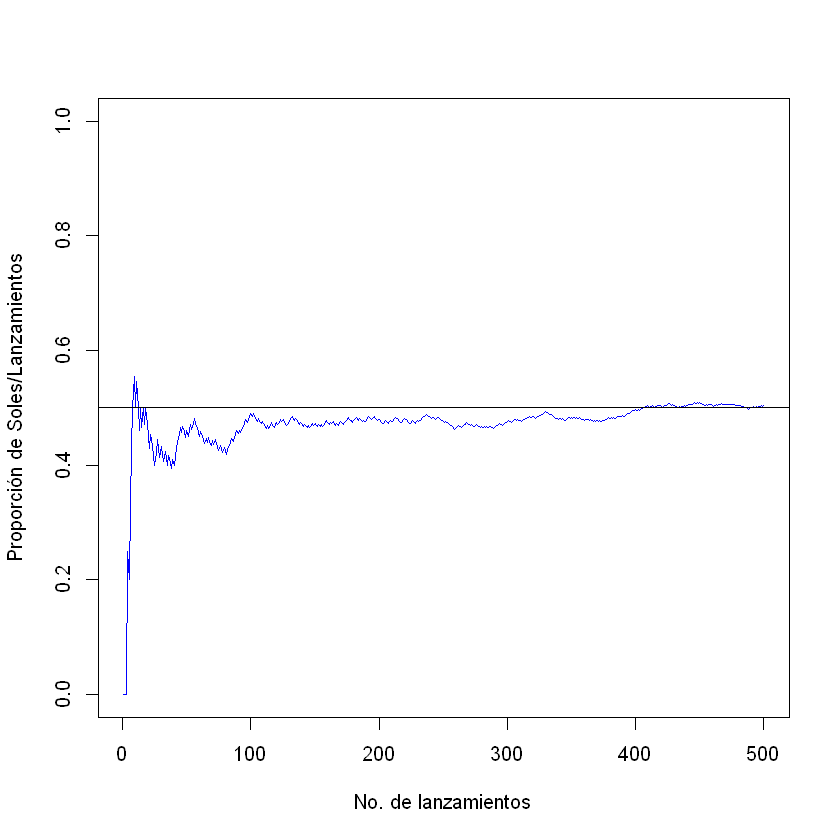

In [12]:
#Realizamos la gráfica
plot(1:N,proporcion_soles,type = 'l',ylim =c(0,1),xlab = 'No. de lanzamientos',
     ylab = 'Proporción de Soles/Lanzamientos',col = 'blue')
abline(h=0.5)

integer(0)

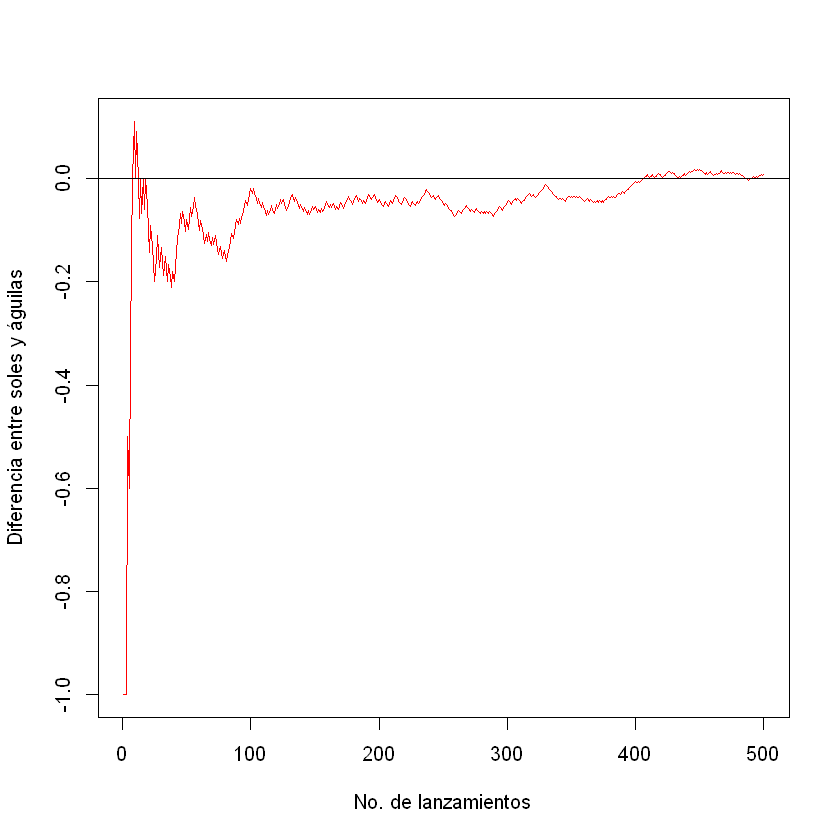

In [13]:
#Calculemos ahora la diferencia entre soles y águilas
difsoles_aguilas <- (2*cumsum(x)-1:N)/1:N
#Realizamos la gráfica
plot(1:N,difsoles_aguilas,type = 'l',xlab = 'No. de lanzamientos',
     ylab = 'Diferencia entre soles y águilas',col = 'red')+abline(h=0)


Que $(2r-n)/n$ tienda a cero, cuando $n$ se hace cada vez más grande, significa que para $n$ muy grandes la proporción de soles y águilas es la misma, $50/50$

# Problema 3

Una canoa que contiene tres mujeres y tres hombres llega a una isla deshabitada.
Discutan la información que requieren para modelar la sociedad de estos individuos
y cómo el tamaño de la población crece con el tiempo. Por ejemplo, pueden hacer
supuestos como los siguientes y hacer modificaciones para ver cómo cambiarían
las proyecciones que hagan:

Todas las personas son adultos (digamos 20 años todos). La edad de las mujeres es importante para el tema de capacidad reproductiva.

Las parejas se determinan al inicio y no hay cambios de pareja a lo largo del
tiempo

Cada pareja puede tener una bebé al año con probabilidad p, y éste sobrevive
con probabilidad w.


Podemos hacer los siguientes supuestos:

- La unidad de tiempo es el año
- Cada pareja tiene un hijo al año
- Que una pareja tenga un hijo o no es independiente del resto de las parejas
- La supervivencia de un niño recien nacido es independiente de la supervivencia del resto de niños
- La población en edad reproductiva se mantiene equilibrada, aproximadamente 50% hombres y 50% mujeres
- Las personas en edad reproductiva tienen la posibilidad de reproducirse antes de morir, es decir, mueren al final del año
- Sea $P_n$ la población de la isla al inicio del año n

- Sea $SB_n$ los niños que nacieron y sobrevivieron en el tiempo $[n,n+1]$
- Sea $B_n$ los nacimientos totales en el mismo intervalo de tiempo
- Sea $D_n$ las muertes de personas no recien nacidas en el mismo intervalo de tiempo
- Una pareja tiene un hijo con probabilidad $p_b$
- Un niño recien nacido sobrevive con probabilidad $p_s$
- Después del año en el que una persona nacio, tiene una probabilidad $q_m$ de sobrevivir en ese año
- Una persona no recien nacida sobrevive independientemente de la supervivencia de otra.
- Sea $F_n$ el número de personas en edad reproductiva

Entonces tenemos lo siguiente:


Si consideramos que una persona entra en edad reproductiva a los 15 años, entonces para $n\leq 15$ tenemos que las personas en edad reproductiva es a lo más $P_0$.
Entonces, tenemos lo siguiente:

- $B_n|F_n=f_n \sim Bin(piso(\frac{f_n}{2}),p_b)$
- $SB_n|B_n=b_n \sim Bin(b_n,p_s)$
- $F_{n+1}|F_n=f_n \sim Bin(f_n,q_m)$

Notar que  $F_n-F_{n+1}$ es el numero de personas en edad reproductiva que murieron ese año, entonces las muertes son

- Muertes en personas que no estan en edad reproductiva es $Bin(p_n-f_n,1-q_m)$
- Obtener $D_n$ Sumamos el punto anterior y  $F_n-F_{n+1}$

Finalmente
$P_{n+1} = P_n + SB_n-D_n$


El proceso comienza con

$F_n$ = P_0
La población en edad reproductiva al inicio son las 6 personas que hay en la isla

In [14]:
poblacion_isla <- function(P_0,p_b,p_s,q_m){
    n<-0
    P_ant <- P_0
    poblacion <- numeric()
    F_actual <- P_0
    p_m <- 1 - q_m
    
    
    while(n<=14){
        nacimientos <-rbinom(1,F_actual %/% 2, p_b)
        nacimientos <- rbinom(1,nacimientos,p_s)
        F_siguiente <- rbinom(1,F_actual,q_m)
        muertes <- rbinom(1,P_ant-F_actual,p_m)+(F_actual-F_siguiente)
        P_sig <- P_ant+nacimientos-muertes
        poblacion <- append(poblacion,P_sig)
        P_ant <- P_sig
        F_actual <- F_siguiente
        n<-n+1

    }
    
    return(poblacion)
}

In [15]:
#Realizaremos la simulacion 6 veces con los mismos parámetros y obtendremos la media del tiempo donde alcanzan las 12 personas
#en la isla, si los alcanza

tiempos <- numeric()
for(i in 1:100){
    x<-poblacion_isla(6,0.9,0.8,0.95)
    x<-ifelse(x>=12,1,0)
    if(sum(x)>0){
        tiempos<-append(tiempos,match(1,x))
    }
}


In [16]:
print(paste("Porcentaje de veces que sí alcanzan a duplicar su población: ",length(tiempos)))
print(paste("Año promedio en el cual alcanzan a duplicar su población",mean(tiempos)))


[1] "Porcentaje de veces que sí alcanzan a duplicar su población:  96"
[1] "Año promedio en el cual alcanzan a duplicar su población 4.65625"



# Problema 6

Función para obtener $Z_n$ a partir de $Z_{n-1}$ en el método del cuadrado medio de John von Neumann

In [17]:


Z_n <- function(Z_0){
    x <- Z_0^2
    x <- as.character(x)
    x <- as.numeric(unlist(strsplit(x, "")))
    if(length(x)==4){
        #4321
        Z_n <- x[2]*10+x[3] #32
    }else{
        
        if(length(x)==3){
            #0-321
            Z_n <- x[1]*10+x[2]#32
        }else{
            if(length(x)==2){
                #00-21
                Z_n <- x[1]#02
            }else{
                #000-1
                Z_n<-0
            }
        }
    }
    return(Z_n)
    


}

In [18]:
cuadrado_medio_rec <- function(Z_0,vector){
    if(Z_0 == 0 || Z_0 %in% vector){
        return (vector)
    }
    
    vector<-append(vector,Z_0)
    x <- Z_0^2
    x <- as.character(x)
    x <- as.numeric(unlist(strsplit(x, "")))
    if(length(x)==4){
        #4321
        Z_n <- x[2]*10+x[3] #32
    }else{
        
        if(length(x)==3){
            #0-321
            Z_n <- x[1]*10+x[2]#32
        }else{
            if(length(x)==2){
                #00-21
                Z_n <- x[1]#02
            }else{
                #000-1
                Z_n<-0
            }
        }
    }
    
    return (cuadrado_medio_rec(Z_n,vector))
    

}

cuadrado_medio <- function(Z_0){
    vector <- numeric()
    return (cuadrado_medio_rec(Z_0,vector))
}

In [19]:
#Ahora enlistamos todos los ciclos.
max = 0
for(i in 1:99){
    print(paste('El ciclo con semilla Z_0:',i))
    x<- cuadrado_medio(i)
    if(length(x)>max){
        max = length(x)
    }
    print(cuadrado_medio(i))
}

[1] "El ciclo con semilla Z_0: 1"
[1] 1
[1] "El ciclo con semilla Z_0: 2"
[1] 2
[1] "El ciclo con semilla Z_0: 3"
[1] 3
[1] "El ciclo con semilla Z_0: 4"
[1] 4 1
[1] "El ciclo con semilla Z_0: 5"
[1] 5 2
[1] "El ciclo con semilla Z_0: 6"
[1] 6 3
[1] "El ciclo con semilla Z_0: 7"
[1] 7 4 1
[1] "El ciclo con semilla Z_0: 8"
[1] 8 6 3
[1] "El ciclo con semilla Z_0: 9"
[1] 9 8 6 3
[1] "El ciclo con semilla Z_0: 10"
[1] 10
[1] "El ciclo con semilla Z_0: 11"
[1] 11 12 14 19 36 29 84  5  2
[1] "El ciclo con semilla Z_0: 12"
[1] 12 14 19 36 29 84  5  2
[1] "El ciclo con semilla Z_0: 13"
[1] 13 16 25 62 84  5  2
[1] "El ciclo con semilla Z_0: 14"
[1] 14 19 36 29 84  5  2
[1] "El ciclo con semilla Z_0: 15"
[1] 15 22 48 30 90 10
[1] "El ciclo con semilla Z_0: 16"
[1] 16 25 62 84  5  2
[1] "El ciclo con semilla Z_0: 17"
[1] 17 28 78  8  6  3
[1] "El ciclo con semilla Z_0: 18"
[1] 18 32  2
[1] "El ciclo con semilla Z_0: 19"
[1] 19 36 29 84  5  2
[1] "El ciclo con semilla Z_0: 20"
[1] 20 40 60
[1] "

In [20]:
#El tamaño máximo del ciclo es
max

[1] 14

Lo cual significa que, partiendo de una semilla de dos cifras, podemos generar un máximo de catorce números distintos antes de que comience un ciclo, o bien, degenere a cero.